In [1]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sys
sys.path.append('..')
from models.cifar10_autoencoder import CIFAR10Autoencoder
from trainers.autoencoder_trainer import AutoencoderTrainer
from models.cifar10_classifier import CIFAR10Classifier
from trainers.classifier_trainer import ClassifierTrainer

In [2]:
data_path = os.path.join("..", "data")
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])
val_transform = transforms.ToTensor()

Files already downloaded and verified
Files already downloaded and verified
Epoch [1] - Train Loss: 0.0991, Val Loss: 0.0755
              Train L1: 0.0991,  Val L1: 0.0755
Epoch [2] - Train Loss: 0.0652, Val Loss: 0.0635
              Train L1: 0.0652,  Val L1: 0.0635
Epoch [3] - Train Loss: 0.0585, Val Loss: 0.0603
              Train L1: 0.0585,  Val L1: 0.0603
Epoch [4] - Train Loss: 0.0550, Val Loss: 0.0550
              Train L1: 0.0550,  Val L1: 0.0550
Epoch [5] - Train Loss: 0.0531, Val Loss: 0.0574
              Train L1: 0.0531,  Val L1: 0.0574
Epoch [6] - Train Loss: 0.0517, Val Loss: 0.0524
              Train L1: 0.0517,  Val L1: 0.0524
Epoch [7] - Train Loss: 0.0511, Val Loss: 0.0521
              Train L1: 0.0511,  Val L1: 0.0521
Epoch [8] - Train Loss: 0.0508, Val Loss: 0.0527
              Train L1: 0.0508,  Val L1: 0.0527
Epoch [9] - Train Loss: 0.0501, Val Loss: 0.0539
              Train L1: 0.0501,  Val L1: 0.0539
Epoch [10] - Train Loss: 0.0502, Val Loss: 0.0517
 

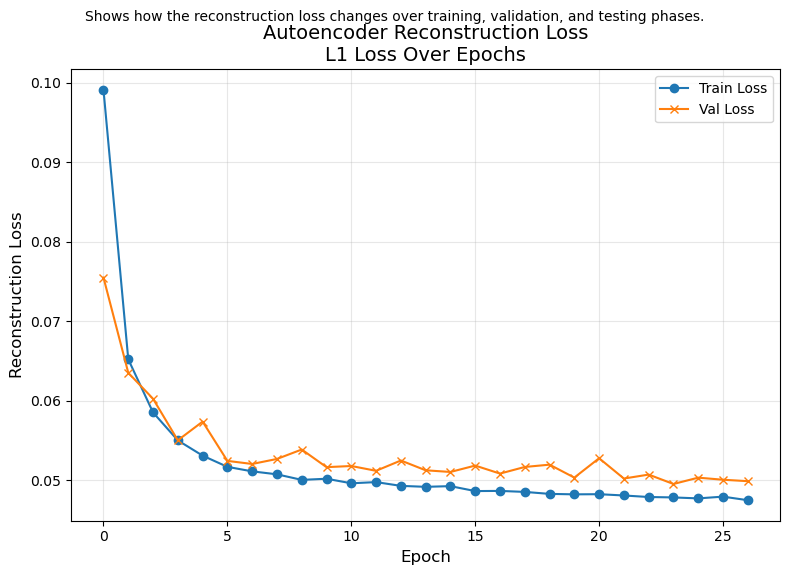

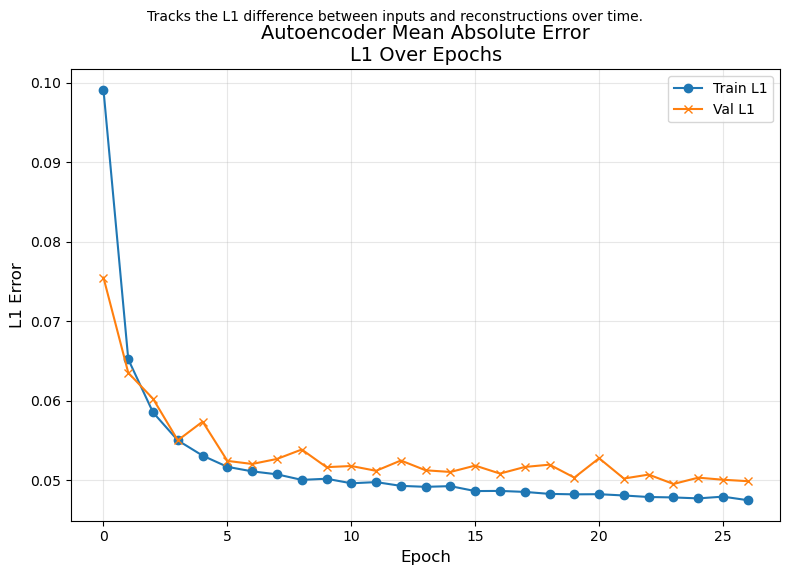

=== Final Autoencoder Metrics ===
Train ReconLoss: 0.0475
Val   ReconLoss: 0.0499
Train L1: 0.0475
Val   L1: 0.0499


In [3]:
train_dataset = datasets.CIFAR10(root=data_path, train=True, download=True, transform=train_transform)
val_dataset   = datasets.CIFAR10(root=data_path, train=False, download=True, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
autoencoder_l1_loss = CIFAR10Autoencoder(latent_dim=128)
autoencoder_trainer = AutoencoderTrainer(
model=autoencoder_l1_loss,
train_loader=train_loader,
val_loader=val_loader,
criterion=torch.nn.L1Loss(),
device='cuda',
lr=5e-4,
num_epochs=100,
weight_decay=1e-5,
)
autoencoder_trainer.train()
autoencoder_trainer.plot_metrics()

Epoch [1] - TrainAcc: 0.3430, ValAcc: 0.4192 | ValLoss: 1.6404
Epoch [2] - TrainAcc: 0.4114, ValAcc: 0.4580 | ValLoss: 1.5460
Epoch [3] - TrainAcc: 0.4313, ValAcc: 0.4683 | ValLoss: 1.5053
Epoch [4] - TrainAcc: 0.4464, ValAcc: 0.4868 | ValLoss: 1.4608
Epoch [5] - TrainAcc: 0.4574, ValAcc: 0.5079 | ValLoss: 1.4137
Epoch [6] - TrainAcc: 0.4648, ValAcc: 0.5122 | ValLoss: 1.3982
Epoch [7] - TrainAcc: 0.4726, ValAcc: 0.5189 | ValLoss: 1.3809
Epoch [8] - TrainAcc: 0.4773, ValAcc: 0.5168 | ValLoss: 1.3825
Epoch [9] - TrainAcc: 0.4779, ValAcc: 0.5316 | ValLoss: 1.3554
Epoch [10] - TrainAcc: 0.4842, ValAcc: 0.5301 | ValLoss: 1.3506
Epoch [11] - TrainAcc: 0.4859, ValAcc: 0.5321 | ValLoss: 1.3400
Epoch [12] - TrainAcc: 0.4884, ValAcc: 0.5316 | ValLoss: 1.3298
Epoch [13] - TrainAcc: 0.4943, ValAcc: 0.5322 | ValLoss: 1.3208
Epoch [14] - TrainAcc: 0.4940, ValAcc: 0.5269 | ValLoss: 1.3349
Epoch [15] - TrainAcc: 0.4950, ValAcc: 0.5422 | ValLoss: 1.3017
Epoch [16] - TrainAcc: 0.4979, ValAcc: 0.5466 | V

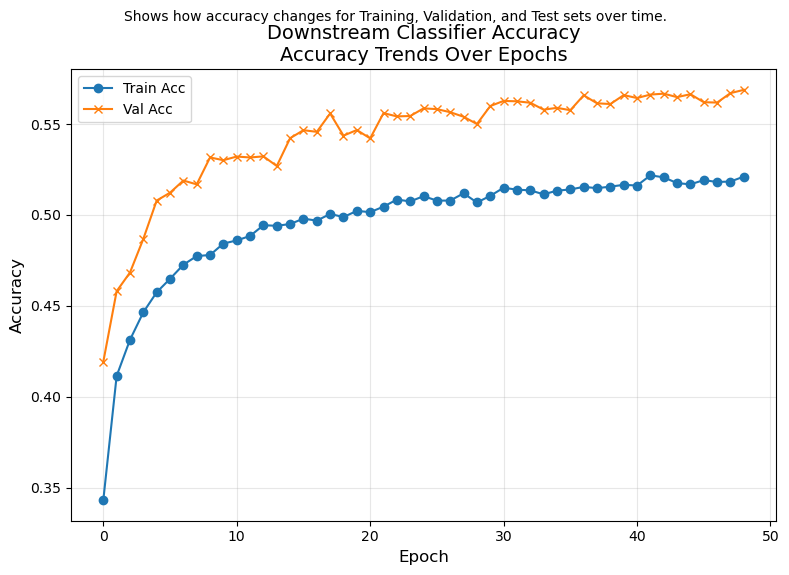

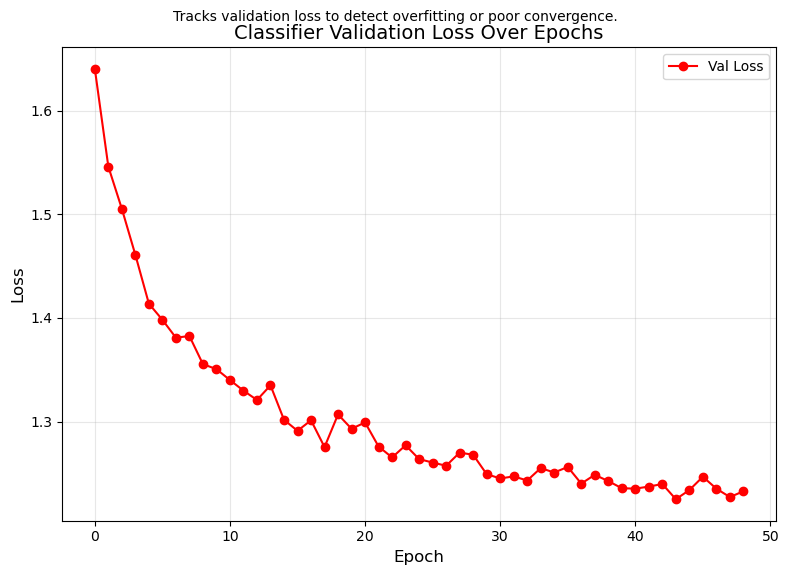

=== Final Classifier Metrics ===
Val Loss: 1.2326
Train Acc: 52.11%
Val   Acc: 56.88%


In [4]:

classifier2 = CIFAR10Classifier(latent_dim=128, num_classes=10)
classifier_trainer2 = ClassifierTrainer(
encoder=autoencoder_l1_loss.encoder,
classifier=classifier2,
train_loader=train_loader,
val_loader=val_loader,
num_epochs=50,
patience=5
)
classifier_trainer2.train() 
print("Autoencoder training done.")
classifier_trainer2.plot_metrics()

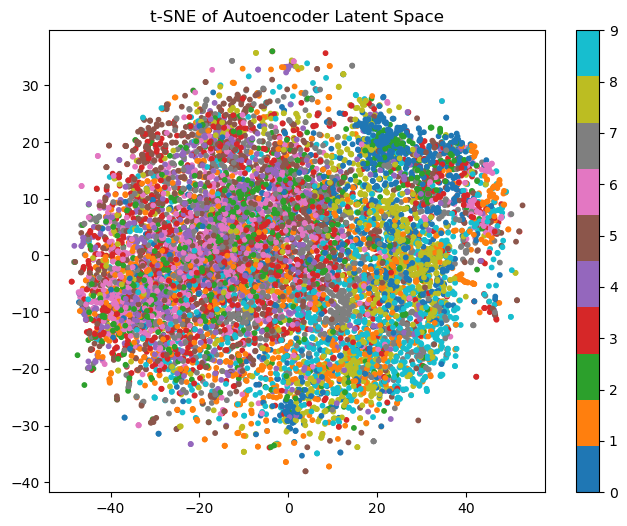

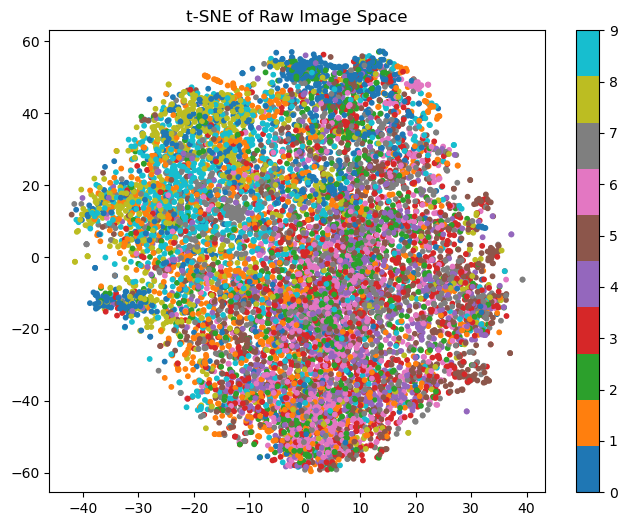

In [5]:
from utils import plot_tsne_autoencoder
plot_tsne_autoencoder(autoencoder_l1_loss, val_loader, device='cuda')

